# Del 9: Priprava in čiščenje podatkov - napredno

## Working With Strings In Pandas

### Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
merged = pd.merge(left=happiness2015,
                 right=world_dev,
                 how="left",
                 left_on="Country",
                 right_on="ShortName")


col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged.rename(col_renaming, axis=1, inplace=True)

In [4]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [5]:
currency_categories = merged["CurrencyUnit"].str.lower().str.split().str.get(-1)
currency_categories.value_counts()

euro        20
franc       16
dollar      12
dinar        8
peso         7
            ..
rupiah       1
lira         1
naira        1
ngultrum     1
afghani      1
Name: CurrencyUnit, Length: 71, dtype: int64

## Regular Expressions in Pandas

In [6]:
import re

In [7]:
print(re.match(r"and", "hand"))

None


In [8]:
print(re.match(r"and", "and"))

<re.Match object; span=(0, 3), match='and'>


In [9]:
print(re.search(r"and", "hand"))

<re.Match object; span=(1, 4), match='and'>


In [10]:
print(re.match(r"and", "andh"))

<re.Match object; span=(0, 3), match='and'>


### Regex in pandas

In [11]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


In [12]:
merged["SpecialNotes"].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [14]:
merged["SpecialNotes"].str.contains(r"[Ff]]iscal year")

0        NaN
1        NaN
2        NaN
3        NaN
4      False
       ...  
153    False
154      NaN
155      NaN
156      NaN
157    False
Name: SpecialNotes, Length: 158, dtype: object

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

### Import new dataset

In [15]:
hn = pd.read_csv('data/hacker_news.csv')

In [16]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [17]:
# Želimo pridobiti vse Python novice
hn[hn["title"].str.contains(r"[Py]ython")].head()

,id,title,url,num_points,num_comments,author,created_at
102,10974870,From Python to Lua: Why We Switched,https://www.distelli.com/blog/using-lua-for-ou...,243,188,chase202,1/26/2016 18:17
103,11244541,Ubuntu 16.04 LTS to Ship Without Python 2,http://news.softpedia.com/news/ubuntu-16-04-lt...,2,1,_snydly,3/8/2016 10:39
144,10963528,Create a GUI Application Using Qt and Python i...,http://digitalpeer.com/s/c63e,21,1,zoodle,1/24/2016 19:01
196,10716331,How I Solved GCHQ's Xmas Card with Python and ...,http://matthewearl.github.io/2015/12/10/gchq-x...,6,1,kipi,12/11/2015 10:38
436,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23


In [18]:
# Želimo pridobiti vse novice z email besedo
hn[hn["title"].str.contains(r"e-?mail")].head()

,id,title,url,num_points,num_comments,author,created_at
119,10603601,Show HN: Send an email from your shell to your...,https://ping.registryd.com,4,1,ybrs,11/20/2015 20:23
313,10736929,Disposable emails for safe spam free shopping,http://couponinbox.com,1,1,genesem,12/15/2015 10:20
1361,11079401,Ask HN: Doing cold emails? helps us prove this...,NaN,8,12,going_to_800,2/11/2016 10:48
1750,12021044,"Protect yourself from spam, bots and phishing ...",http://die.life?x=3,4,2,code2crud,7/2/2016 2:04
2421,10934913,Ashley Madison hack treating email,http://pastebin.com/V5tmcFXq,7,4,hippich,1/19/2016 23:24


In [19]:
# Želimo pridobiti vse email naslove
hn.loc[hn["title"].str.contains(r"[\w\d\-\.]+a?@[\w]+\.\w+"), "title"].head(10)

1057    Site for generating bids and invoices- User:te...
Name: title, dtype: object

In [20]:
hn.loc[1057, "title"]

'Site for generating bids and invoices- User:test000@bidvoice.co PW:Test_000'

In [21]:
# želimo ugotoviti vse tipe podatkovnih baz
hn["title"].str.extract(r"(\w+SQL\w*)", flags=re.I)[0].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: 0, dtype: int64

In [22]:
# Izbiranje URLjev

hn["url"].str.extract(r"(?P<protocol>https?):\/\/(?P<domain>[\w\.]+)\/?(?P<path>[^\s]*)")

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


In [23]:
#pd.options.display.max_colwidth = 150

In [24]:
import pandas as pd

# Create a pandas dataframe with a column of URLs
df = pd.DataFrame({'url': ['https://www.example.com/path1', 'https://www.example.com/path2', 'https://www.example.com/path3']})

# Extract the protocol, domain, and path from the URLs
df = df['url'].str.extract(r'(https?)://([^/]+)/(.*)')

df.rename(columns={'protocol': 'Protocol', 'domain': 'Domain', 'path': 'Path'}, inplace=True)

In [25]:
df

,0,1,2
0,https,www.example.com,path1
1,https,www.example.com,path2
2,https,www.example.com,path3


## Working With Missing Data

### Introduction

In [26]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [27]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [28]:
shape_2015

(164, 13)

In [29]:
shape_2016

(164, 14)

In [30]:
shape_2017

(164, 13)

### Identifying Missing Values

In [31]:
missing = happiness2015['Happiness Score'].isnull()

In [32]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [33]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [34]:
missing_2016 = happiness2016.isnull().sum()

In [35]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [36]:
missing_2017 = happiness2017.isnull().sum()

In [37]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [38]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [39]:
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

In [40]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [41]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ', regex=True) \
                    .str.replace('\s+', ' ', regex=True) \
                    .str.strip() \
                    .str.upper()

In [42]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [43]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [44]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [45]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [46]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [47]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [48]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [49]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [50]:
missing = combined.isnull().sum()

In [51]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [52]:
import seaborn as sns

In [53]:
combined_updated = combined.set_index('YEAR')

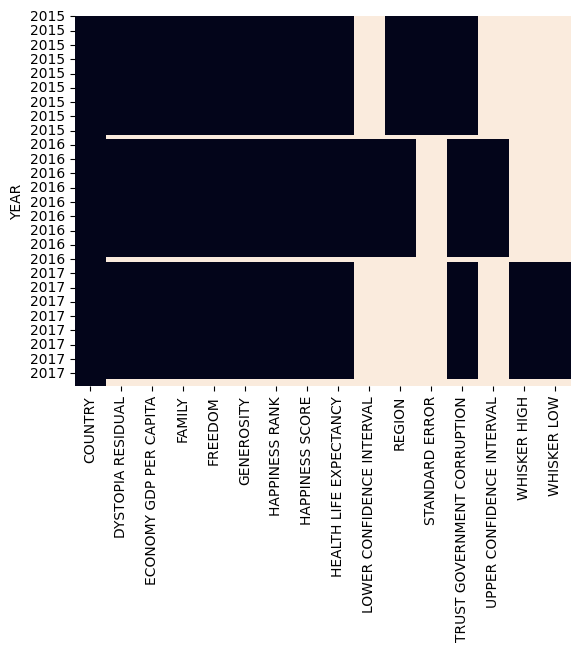

In [54]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [55]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

In [56]:
missing = regions_2017.isnull().sum()

In [57]:
missing

164

### Using Data From Additional Sources to Fill in Missing Values

In [59]:
# create dataframe named regions containing all of the countries 
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()
regions = pd.concat([regions2015, regions2016], ignore_index=True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)

In [60]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [61]:
combined = pd.merge(left=combined, 
                     right=regions, 
                     on='COUNTRY',
                     how='left')

In [62]:
combined.shape

(492, 18)

In [63]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'REGION_x',
       'STANDARD ERROR', 'TRUST GOVERNMENT CORRUPTION',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'YEAR',
       'REGION_y'],
      dtype='object')

In [64]:
combined = combined.drop('REGION_x', axis=1) 

In [65]:
missing = combined.isnull().sum()

In [66]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                         0
dtype: int64

### Identifying Duplicates Values

In [67]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION_y'],
      dtype='object')

In [68]:
combined.rename(columns = {'REGION_y':'REGION'}, inplace=True)

In [69]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

In [70]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [71]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [72]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [73]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [74]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [75]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [76]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


It's also important to note that by default, the drop_duplicates() method will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows.

In [77]:
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [78]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Handle Missing Values by Dropping Columns

In [79]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     19
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION                           0
dtype: int64

In [80]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

Use the df.isnull() and df.sum() methods to calculate the number of missing values for each column. Assign the result to missing.

In [81]:
combined_droped = combined.drop(columns_to_drop, axis=1)
missing = combined_droped.isnull().sum()

In [82]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

To confirm the number of values that are NOT missing, we can use the DataFrame.notnull()method:

In [83]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

Use the df.isnull() and df.sum() methods to calculate the number of missing values for each column. Assign the result to missing.

In [84]:
combined_droped = combined.dropna(thresh=159, axis=1).copy()
missing = combined_droped.isnull().sum()
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

### Analyzing Missing Data

In [85]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [86]:
sorted = combined_droped.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])

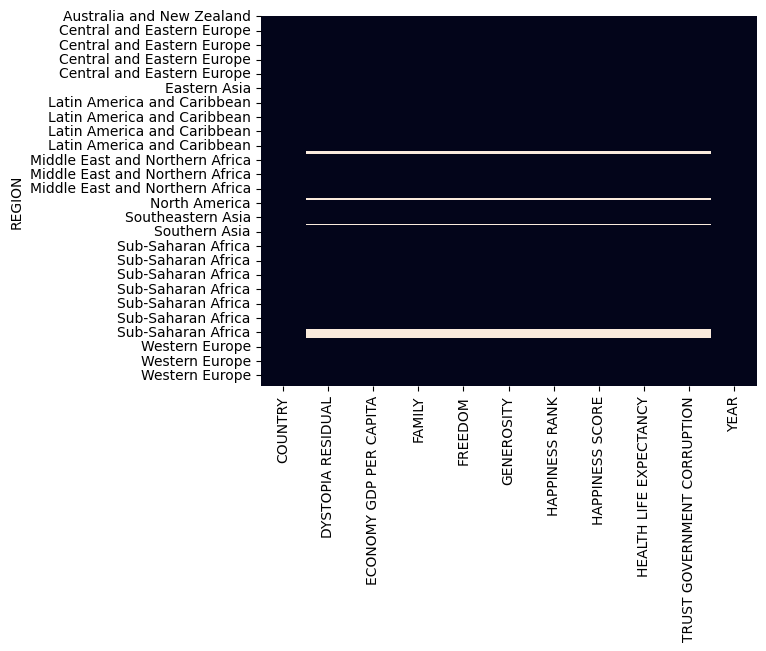

In [87]:
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

### Handling Missing Values with Imputation

In [88]:
happiness_mean = combined_droped['HAPPINESS SCORE'].mean()

In [89]:
happiness_mean

5.370727659882891

In [90]:
combined_droped['HAPPINESS SCORE UPDATED'] = combined_droped['HAPPINESS SCORE'].fillna(happiness_mean)
combined_droped['HAPPINESS SCORE UPDATED'].mean()

5.370727659882891

### Dropping Rows

In [91]:
combined_droped.pivot_table(index='REGION',
                           values='HAPPINESS SCORE',
                           margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [92]:
combined_droped = combined_droped.dropna()

In [93]:
missing = combined_droped.isnull().sum()

In [94]:
missing

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [95]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

In [96]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [97]:
h_2015 = happiness2015['Region'].unique()
# Print the sorted values
np.sort(h_2015)

array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

Vidimo, da nekatere vrednsti imajo piko.

In [98]:
happiness2015[happiness2015['Region'] == '.']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [100]:
# Preberemo še enkrat, da se rešimo manjkajočih vrednosti
happiness2015 = pd.read_csv('data/wh_2015_special.csv', na_values='.')

In [101]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   0
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [102]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [103]:
# nadomestimo še ? z NaN
happiness2015.replace('?', np.nan, inplace=True)

In [104]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Primer: Diabetes

In [105]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [106]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [107]:

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [108]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The diabetes DataFrame has 0's in the column BMI. But BMI cannot be 0. It should instead be NaN.

Vidimo da BMI ne more biti 0.

In [109]:
# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.loc[diabetes['BMI'] == 0, 'BMI']

In [ ]:
zero_bmi

In [110]:
# Set the 0 values of column 'BMI' to np.nan
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = np.nan

In [111]:
# Print the 'NaN' values in the column BMI
diabetes.loc[diabetes['BMI'].isnull(), 'BMI']

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

#### Analyzing missingness percentage

The elementary step in analyzing the data is to analyze the amount of missingness, that is the number of values missing for a variable.

In [112]:
# Create a nullity DataFrame airquality_nullity
diabetes_nullity = diabetes.isnull()
# Calculate total of missing values
missing_values_sum = diabetes_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [113]:
# Calculate percentage of missing values
missing_values_percent = missing_values_sum/diabetes.shape[0] * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


## Andvance Visualization of Missing Data

https://github.com/ResidentMario/missingno

In [114]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

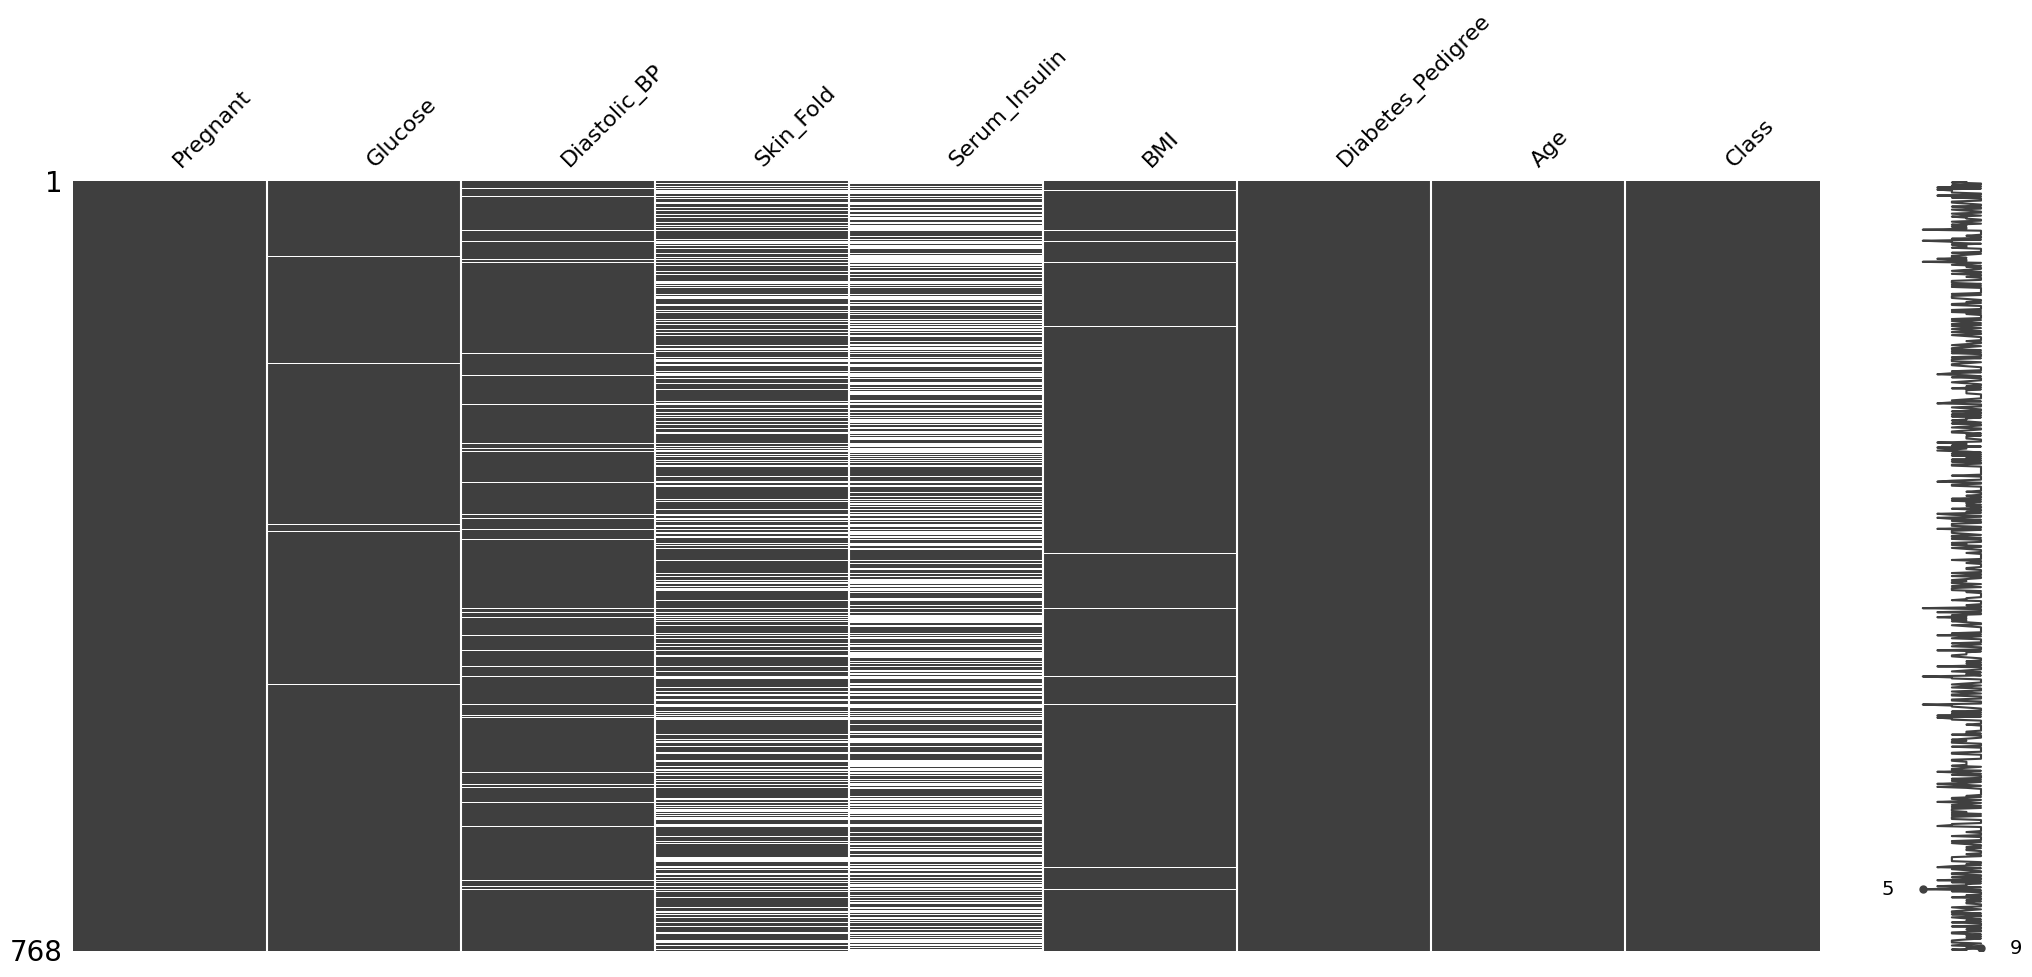

In [115]:
# Visualize the missingness summary
msno.matrix(diabetes)

# Display nullity matrix
plt.show()

### Missingness Patterns

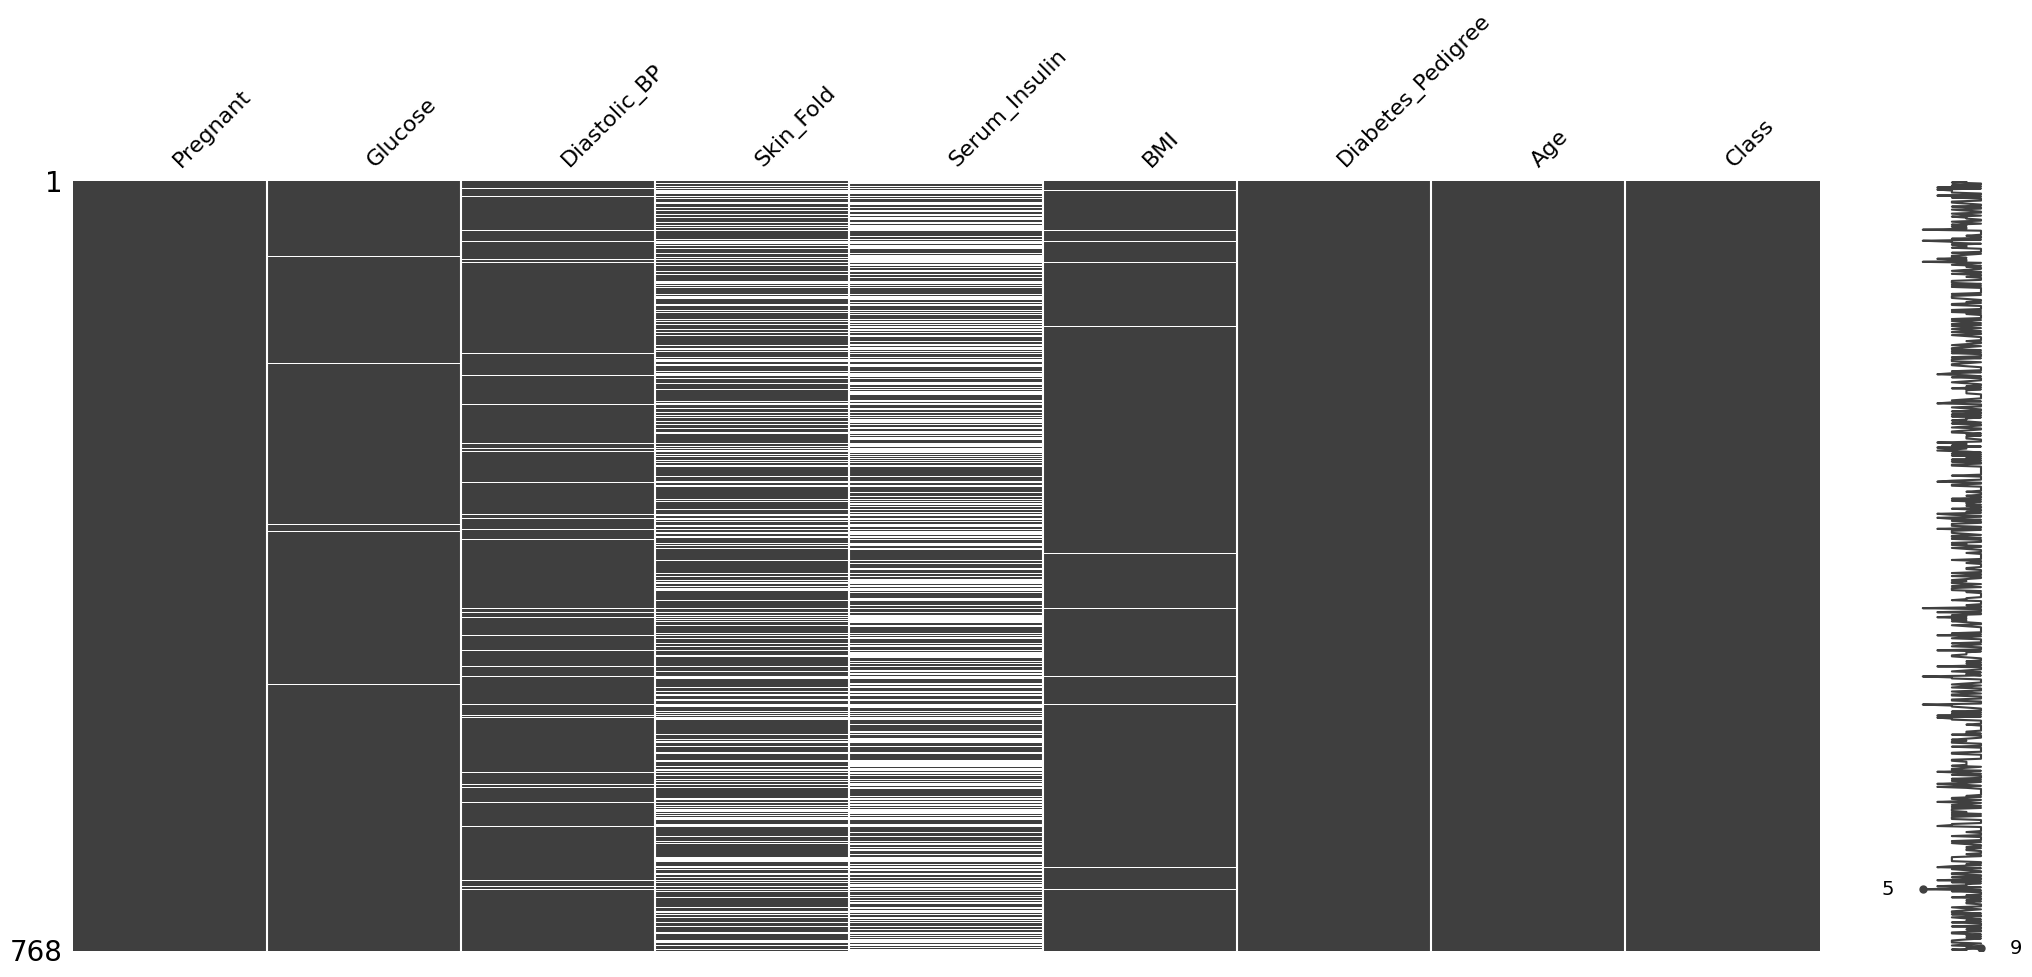

In [116]:
# Visualize the missingness summary
msno.matrix(diabetes)

# Display nullity matrix
plt.show()

Finding correlations between missing data helps you gain a deeper understanding of the type of missing data as well as provides suitable ways in which the missing values can be addressed.

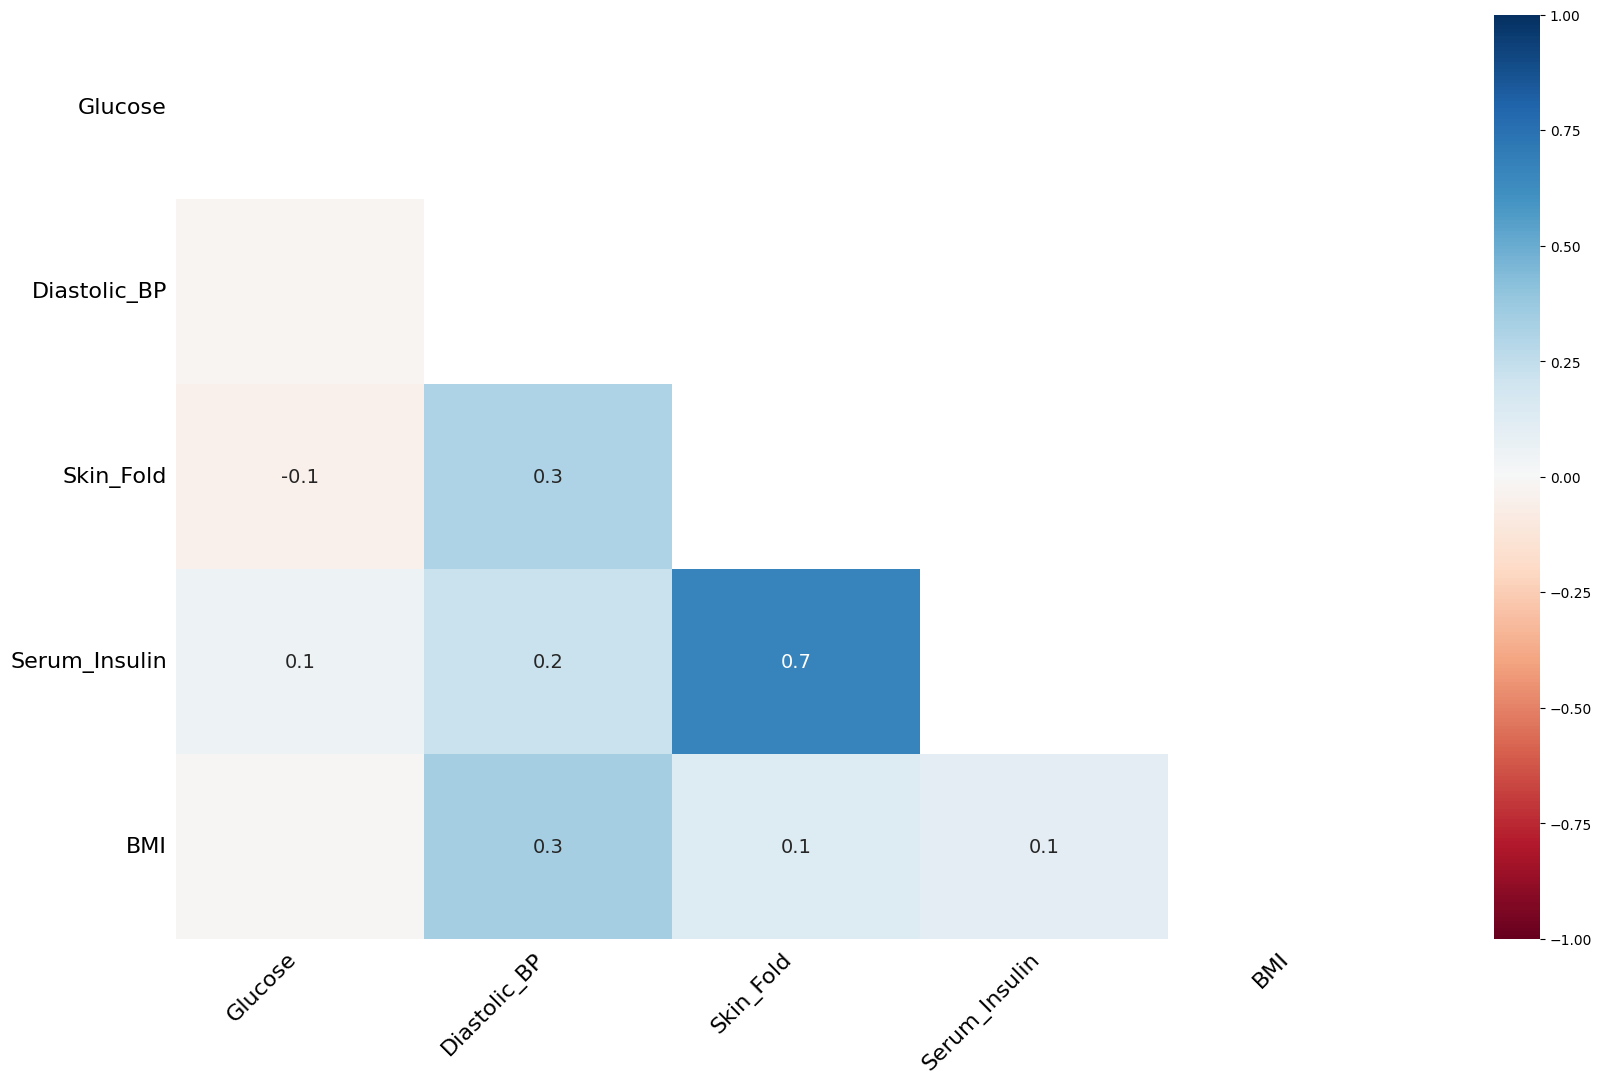

In [117]:
# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)
# Show plot
plt.show()

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

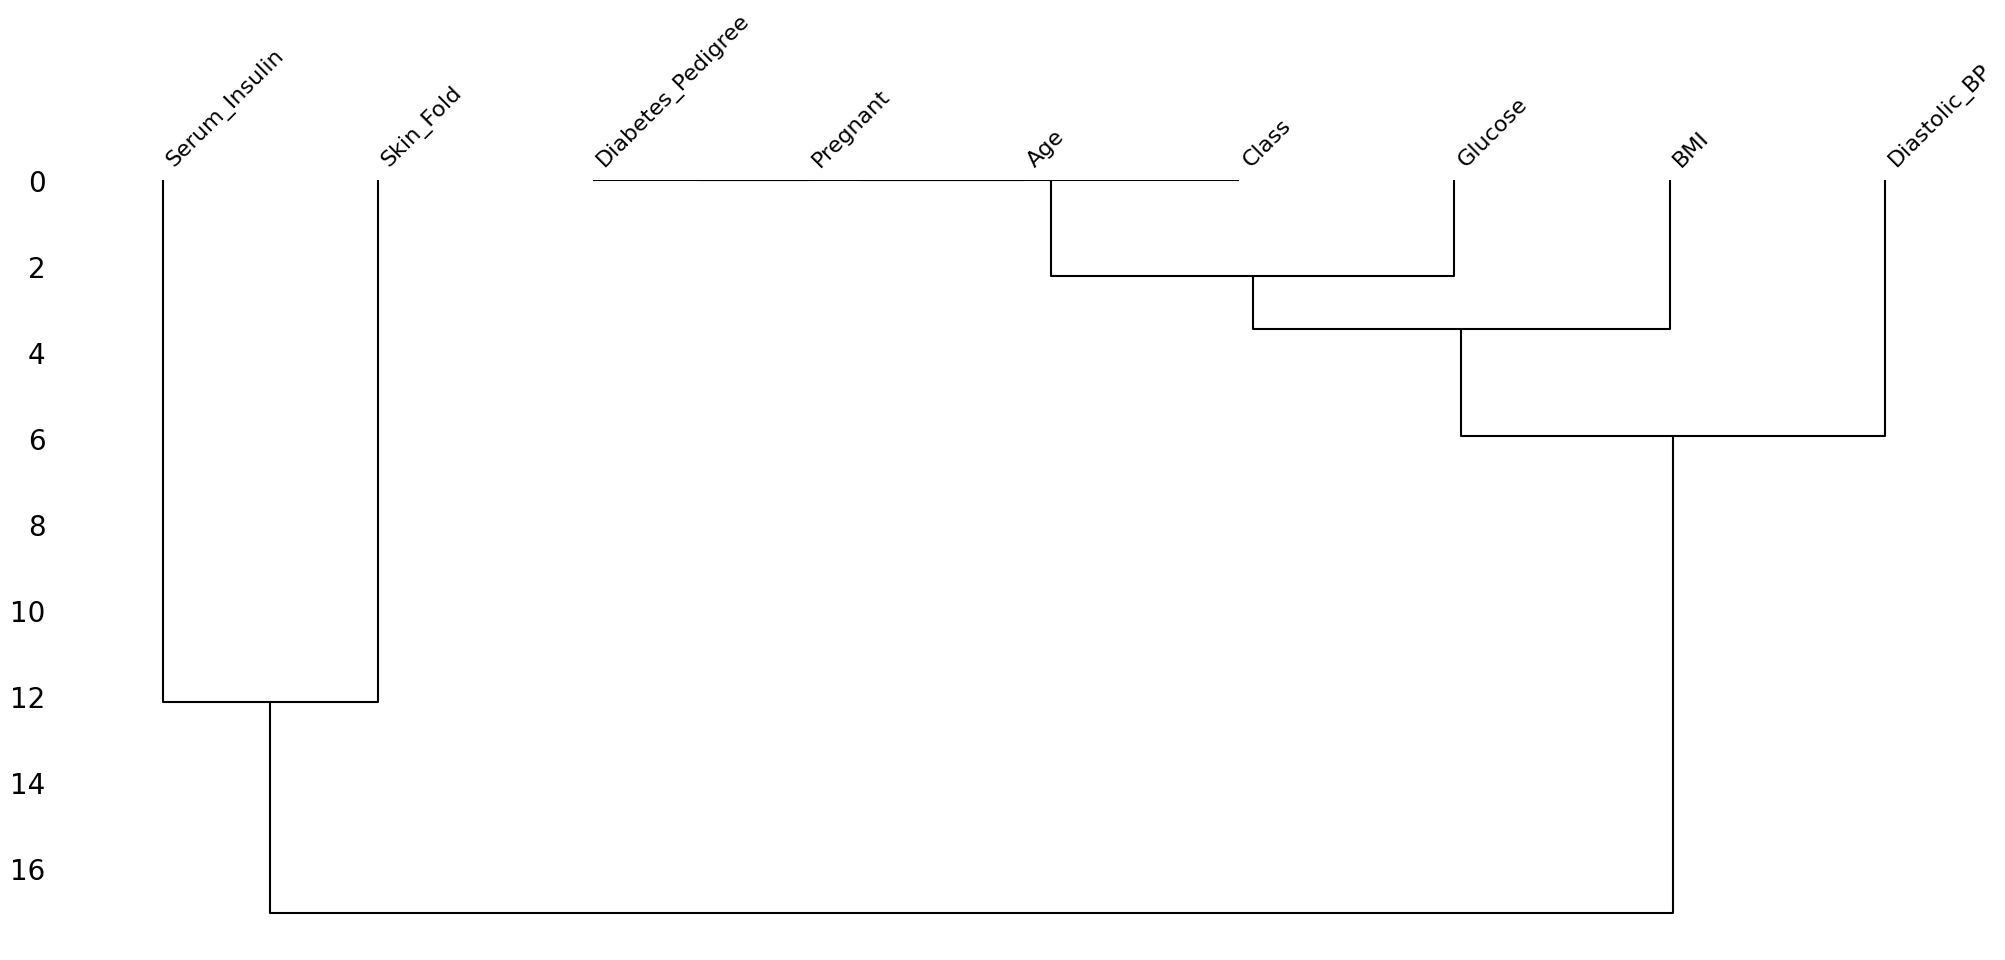

In [118]:
# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

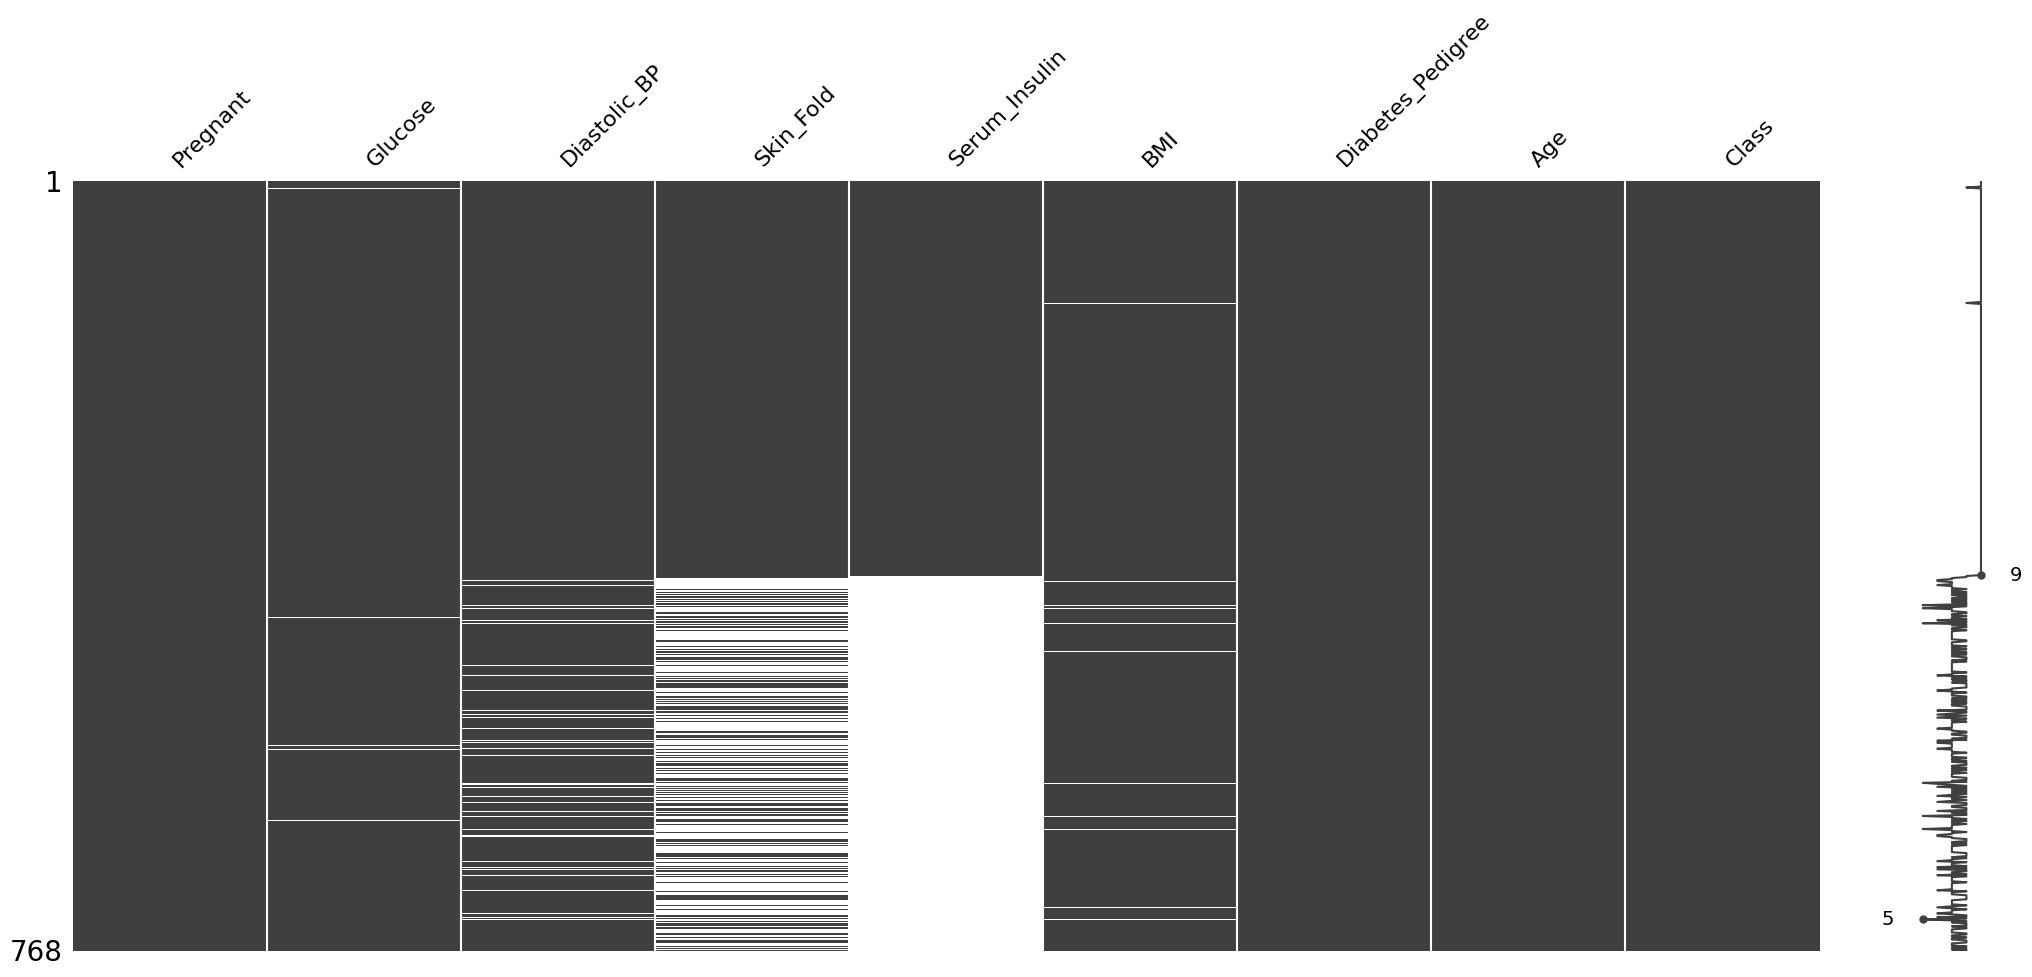

In [119]:
# Sort diabetes dataframe on 'Serum Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
plt.show()

## Handle Missing Values

### Dropping Rows

In [120]:
# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

5


In [121]:
# Drop all rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='all', inplace=True)

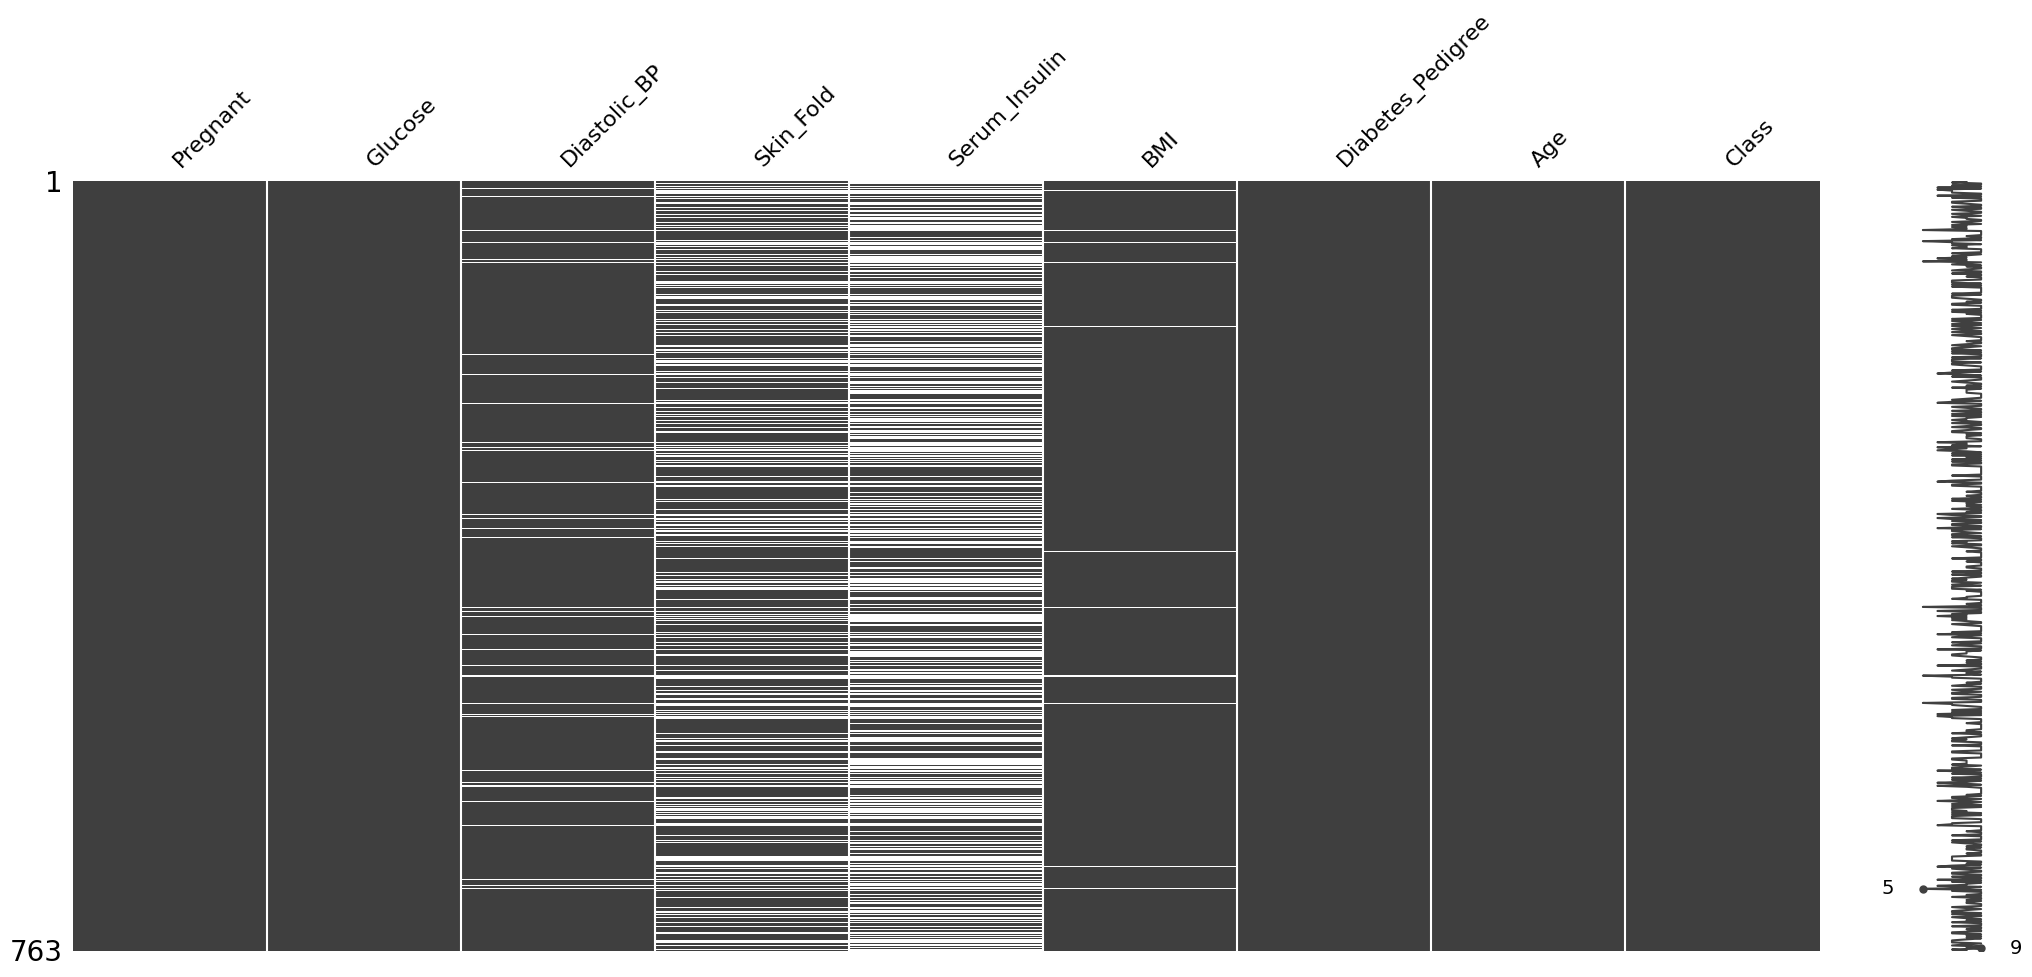

In [122]:
# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)
plt.show()

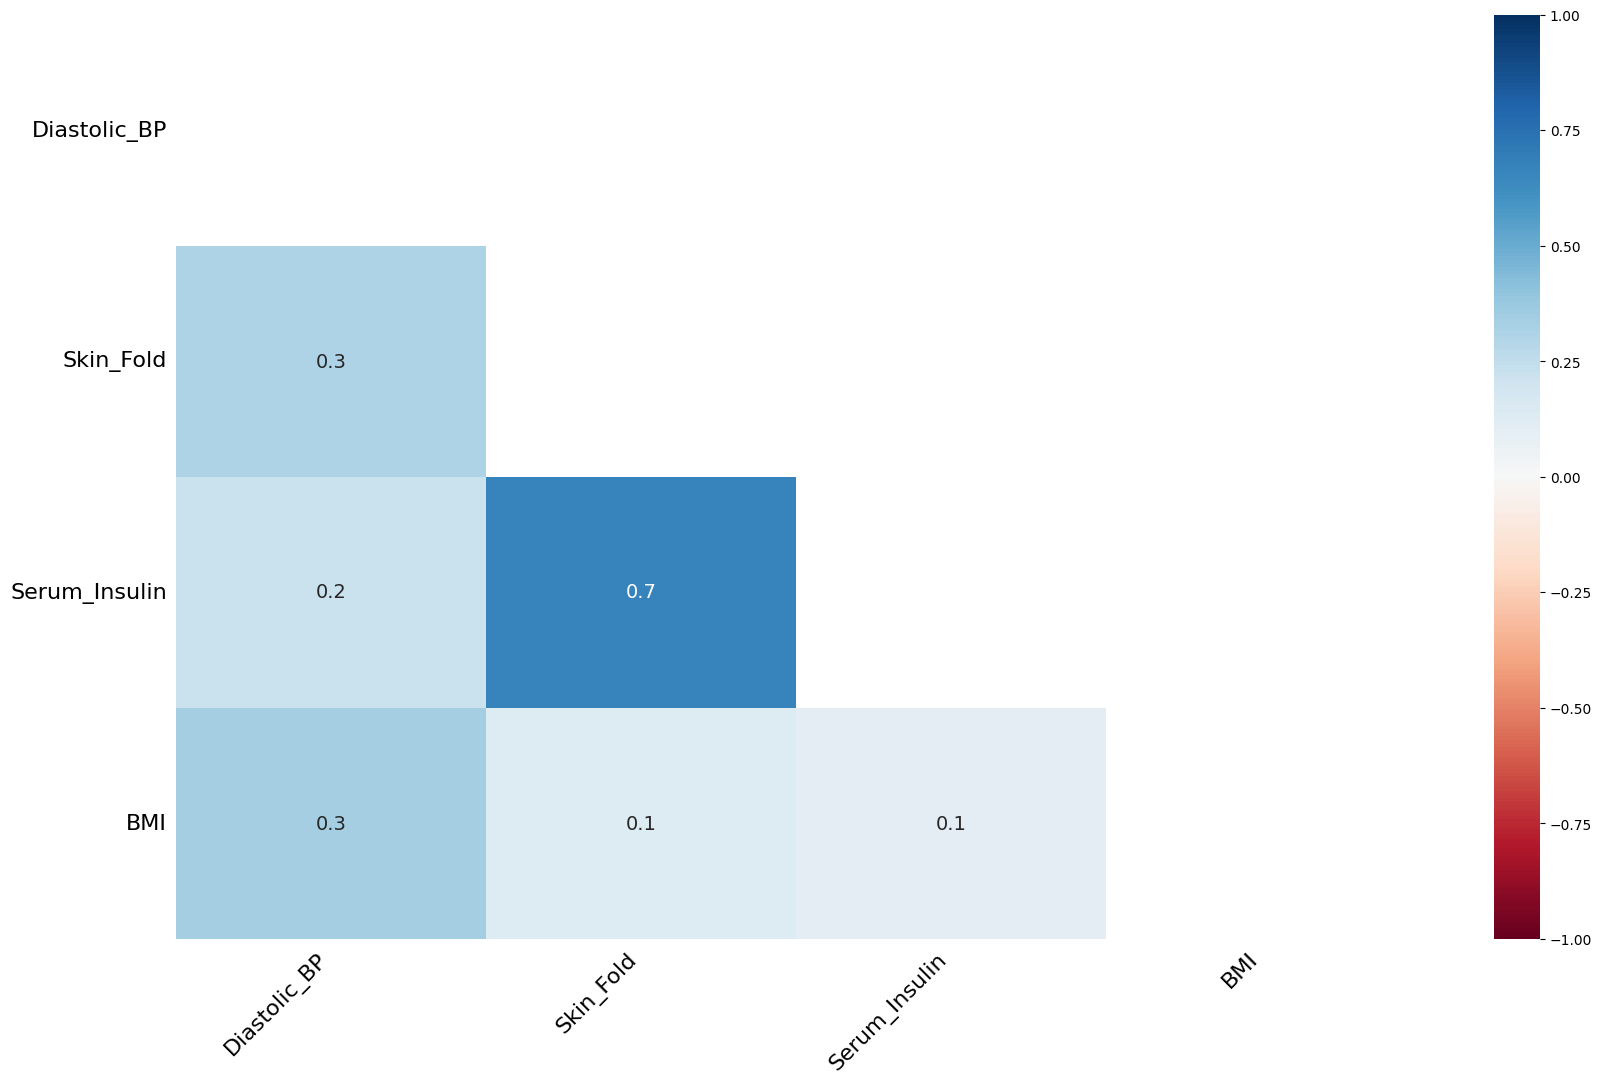

In [123]:
# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

In [124]:
# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)

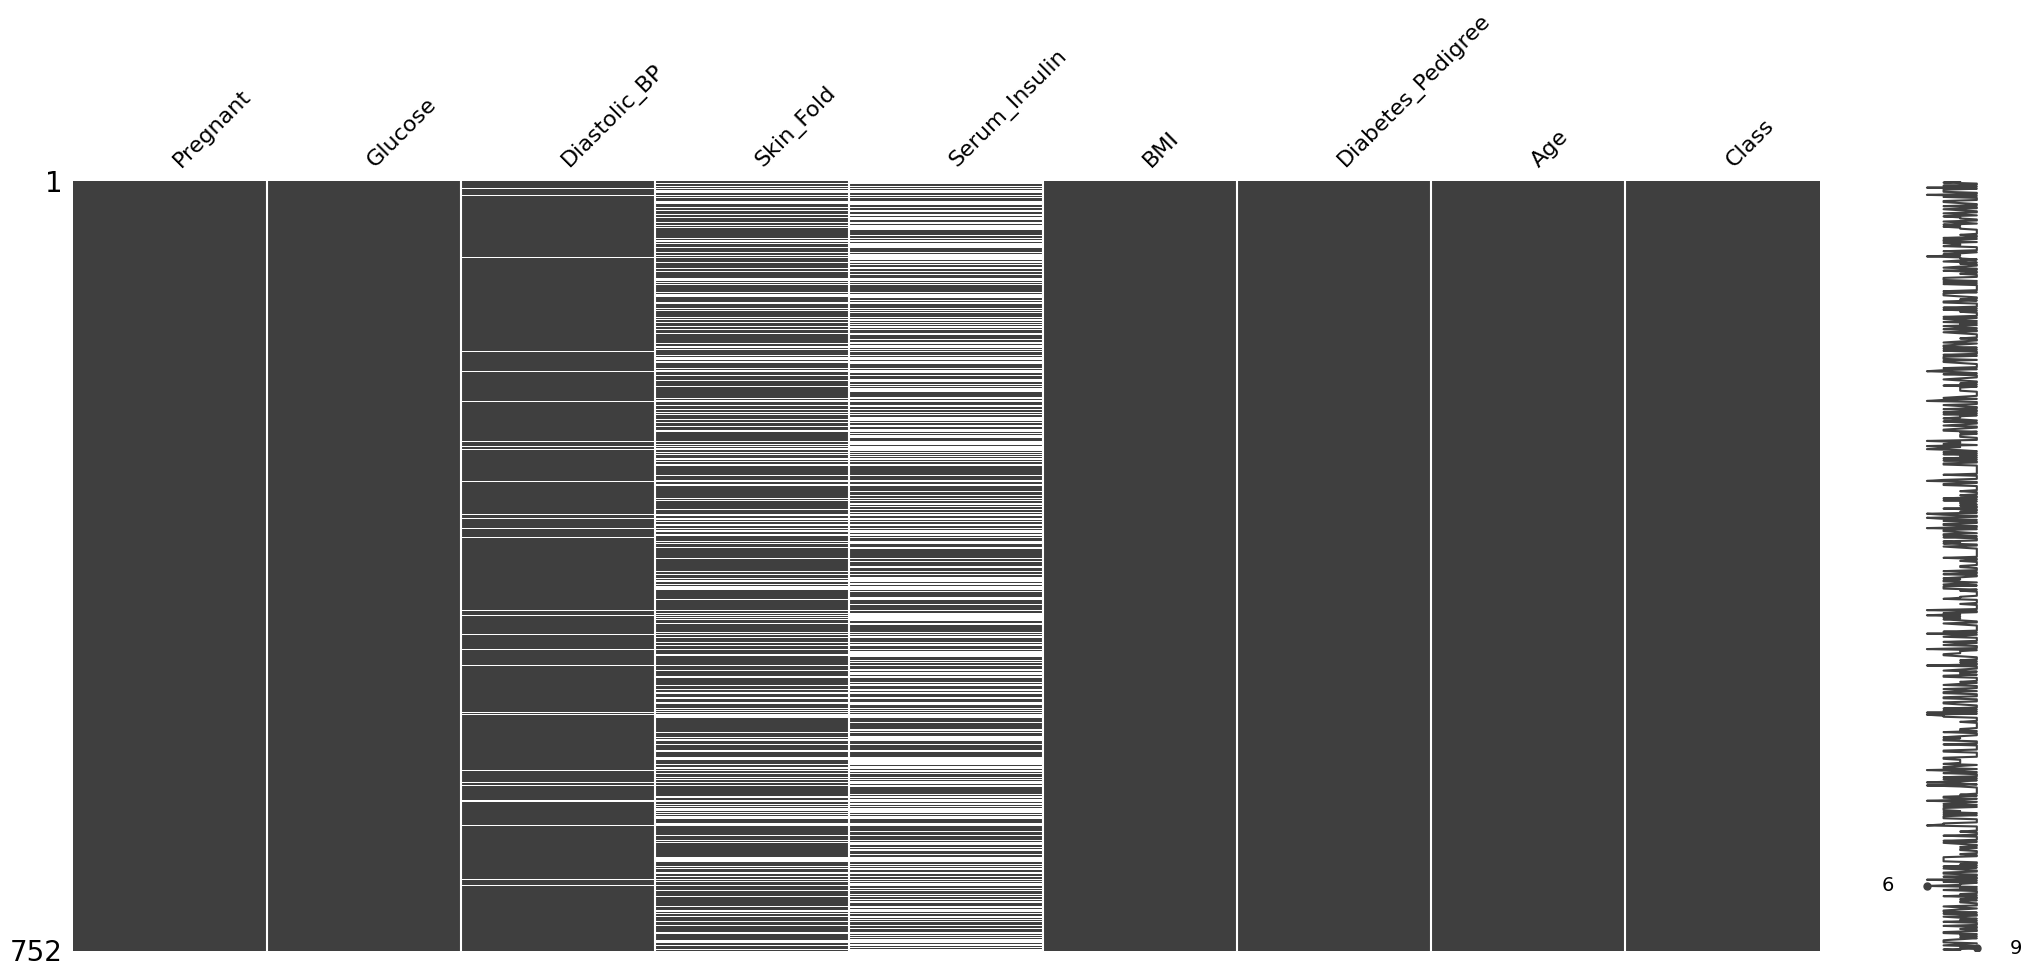

In [125]:
# Visualize the missingness in the data
msno.matrix(diabetes)
plt.show()

### Imputation Techniques

#### Mean & median imputation



Imputing missing values is the best method when you have large amounts of data to deal with. The simplest methods to impute missing values include filling in a constant or the mean of the variable or other basic statistical parameters like median and mode.

In [126]:
from sklearn.impute import SimpleImputer

In [127]:
# Make a copy of diabetes
diabetes_mean = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

/tmp/ipykernel_213482/421426704.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)


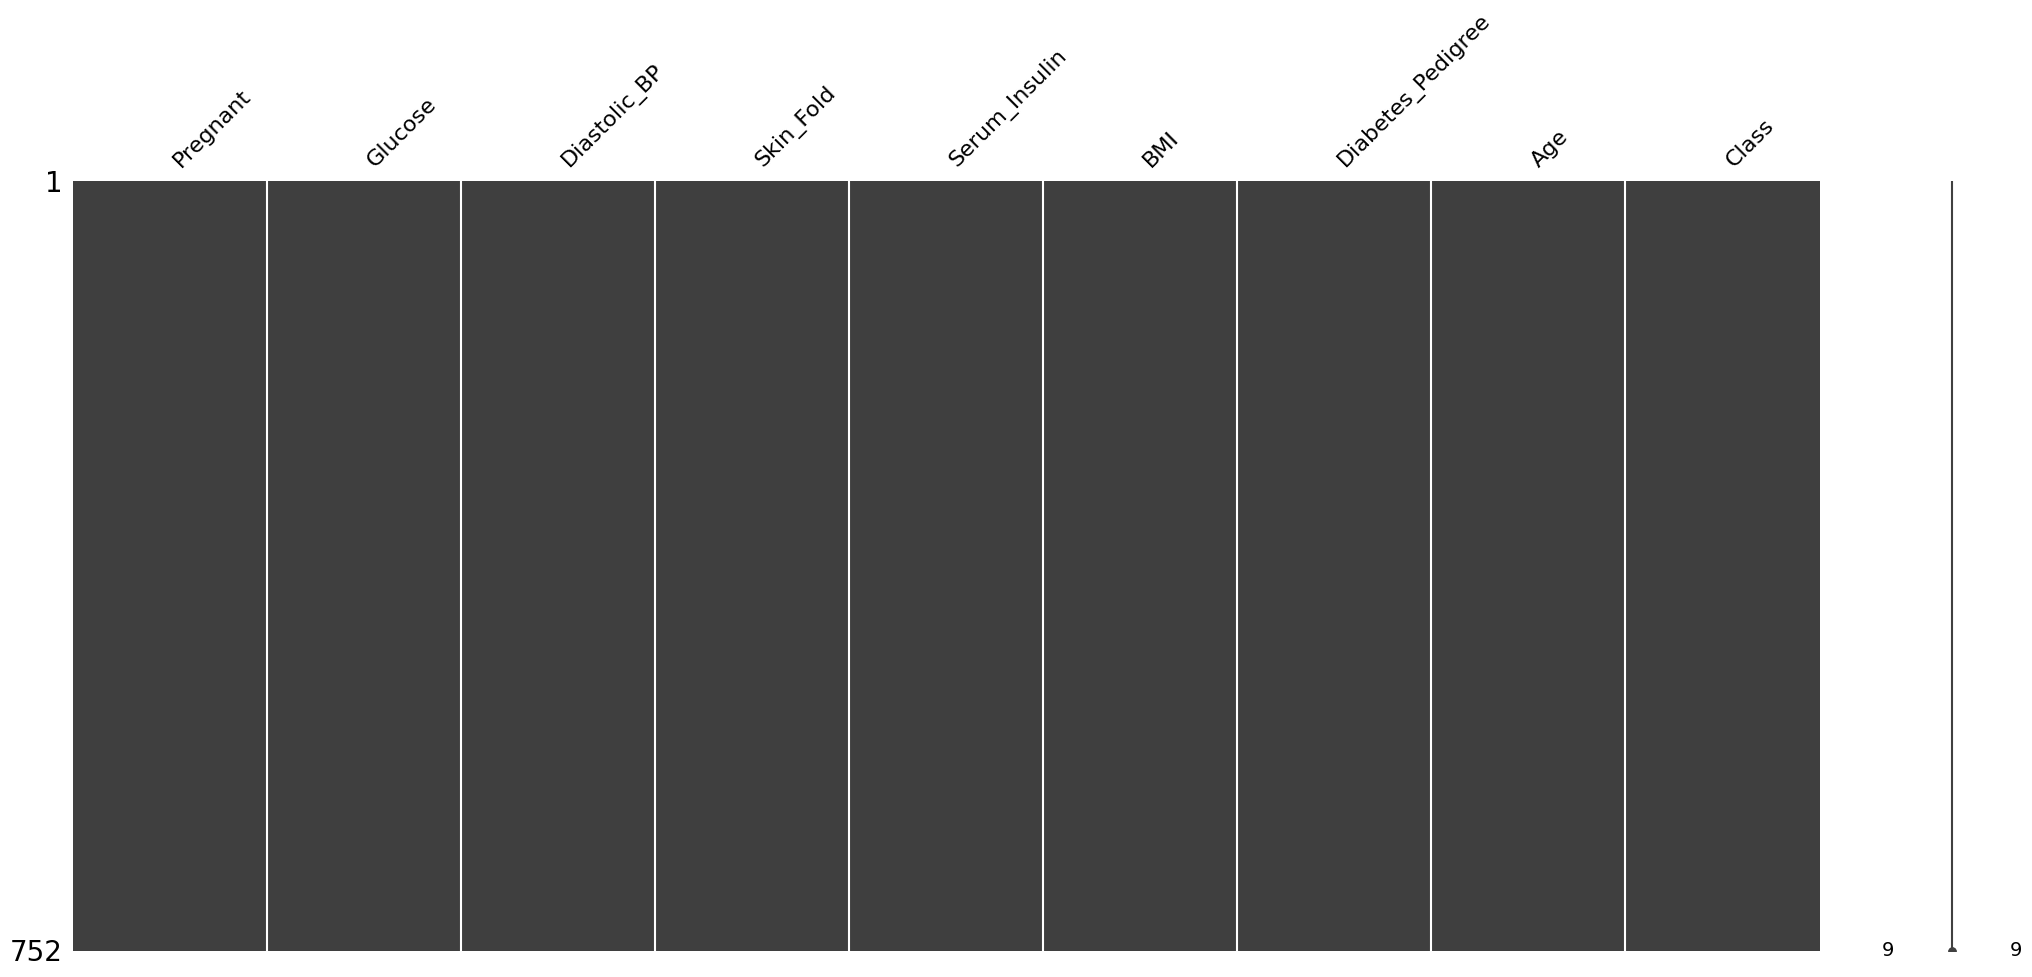

In [128]:
# Visualize the missingness in the data
msno.matrix(diabetes_mean)
plt.show()

In [129]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

/tmp/ipykernel_213482/1150897377.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)


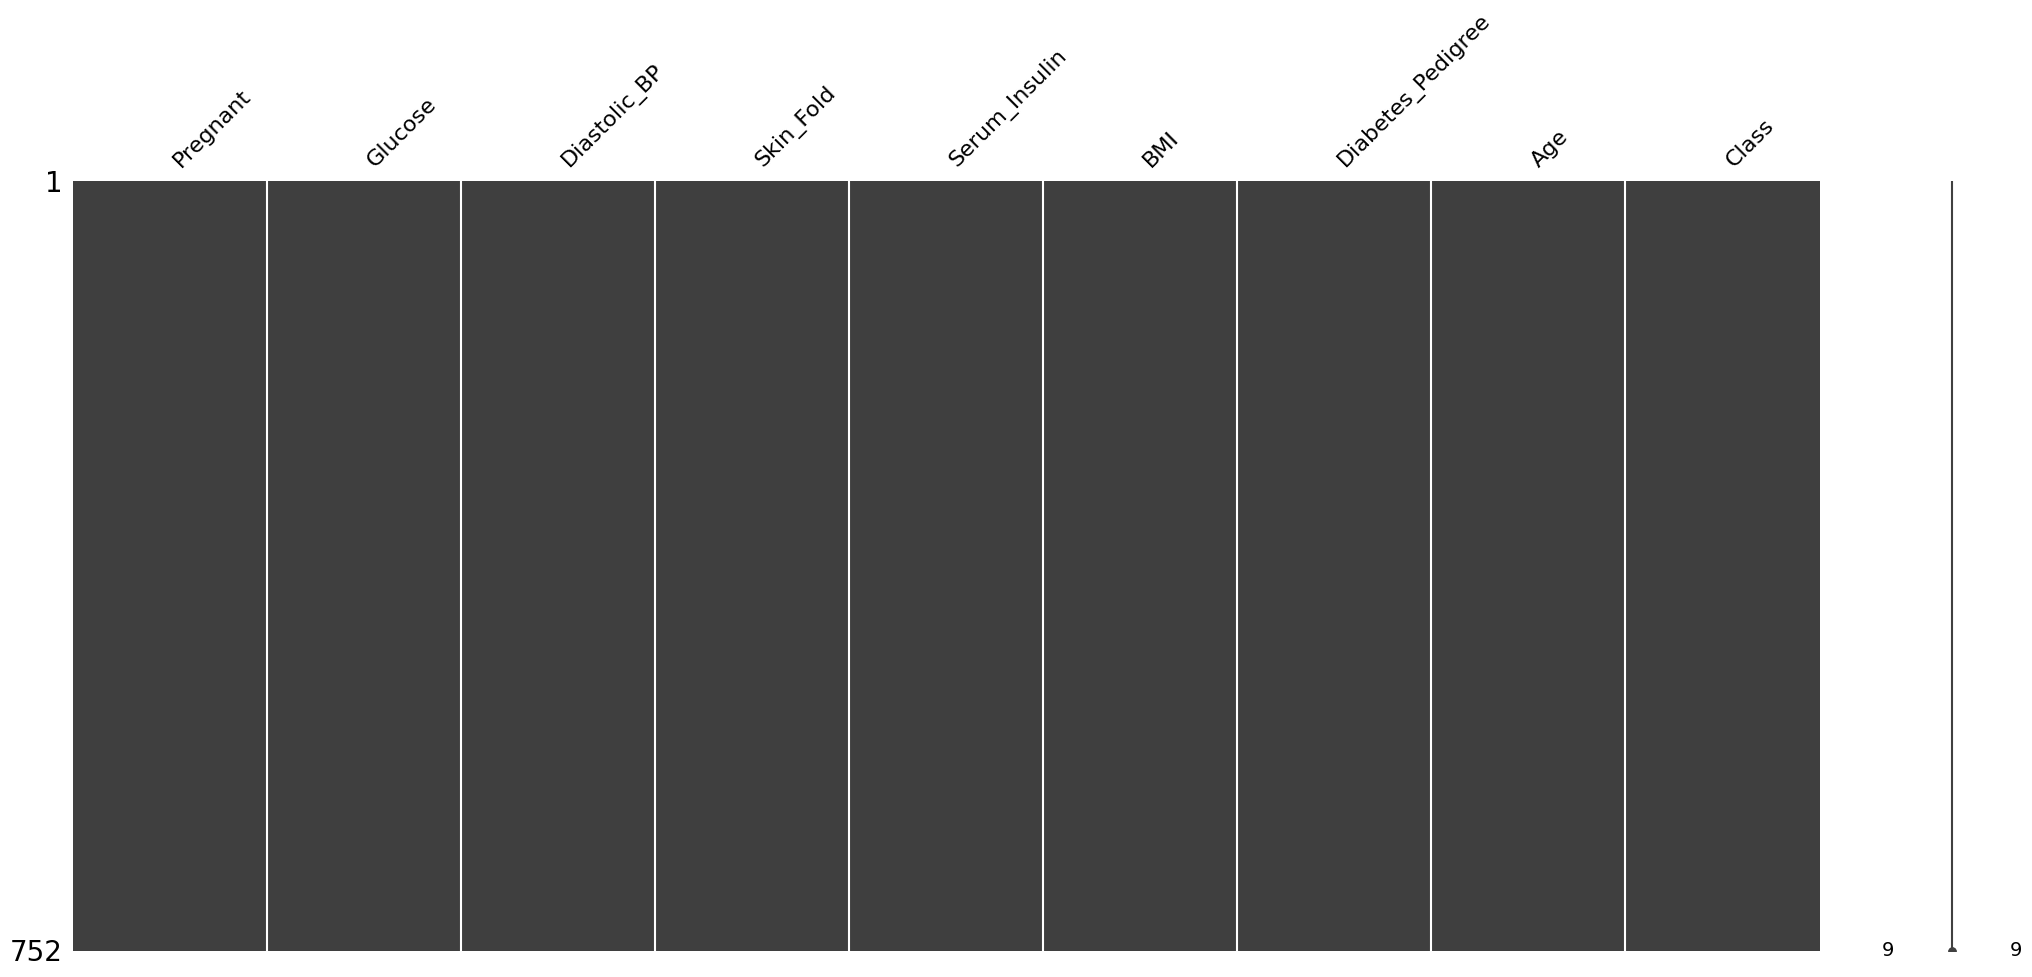

In [130]:
# Visualize the missingness in the data
msno.matrix(diabetes_median)
plt.show()

#### Mode and constant imputation

In [131]:
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

/tmp/ipykernel_213482/2220161927.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)


In [132]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

/tmp/ipykernel_213482/3950709318.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)


#### Visualize imputations

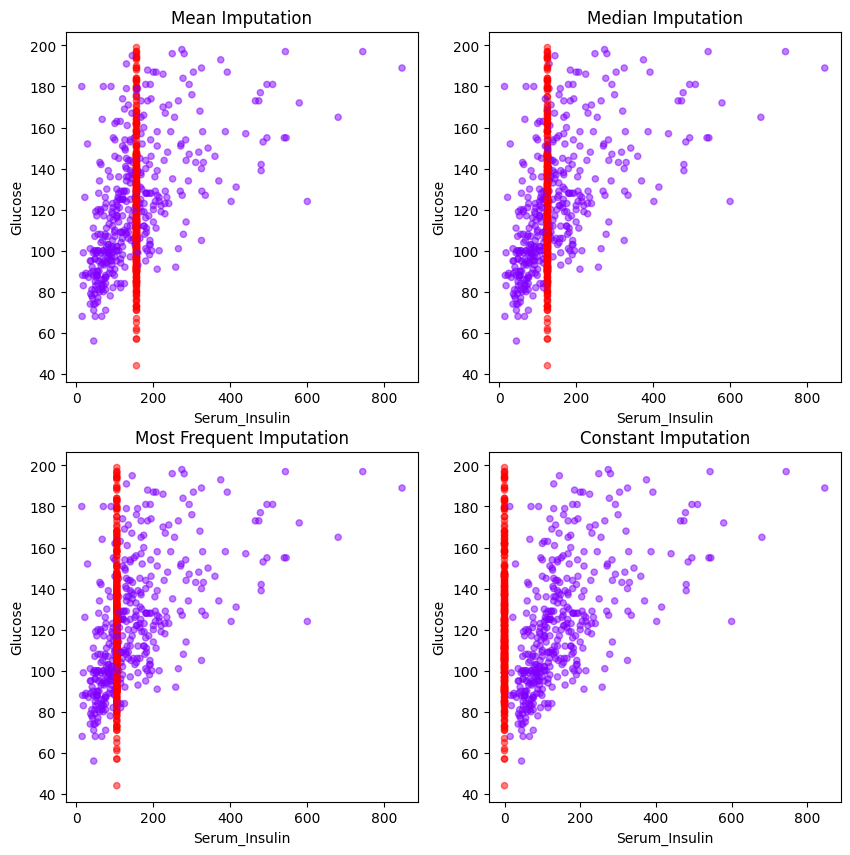

In [133]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes['Serum_Insulin'].isnull() | diabetes['Glucose'].isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()